In [ ]:
# Simple Linear regression
# Prediction usiong PyTorch
# : Class Linear
# : Build Custom Modules using nn.module

# the Method Forward

In [2]:
import torch

w=torch.tensor(2., requires_grad=True)
b=torch.tensor(-1., requires_grad=True)

def forward(x):
    y=b+w*x
    return y

x=torch.tensor([1.])

yhat=forward(x)

In [3]:
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [14]:
# 2개 동시 입력

x=torch.tensor([[1.], [2.]])  # 대괄호 : 리스트안에 리스트 주의

yhat=forward(x)
yhat

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

In [23]:
# Linear 컨스트럭터

from torch.nn import Linear

torch.manual_seed(1)  # 항상 결과를 똑같게 만들기 위하여

model=Linear(in_features=1, out_features=1)   # 한 개의 입력과 한 개의 출력을 갖는 임의의 선형 모델
print(list(model.parameters()))   # 랜덤으로 구성된 모델의 파라미터를 출력하여 확인

x=torch.tensor([0.0])
yhat=model(x)
yhat

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


tensor([-0.4414], grad_fn=<AddBackward0>)

In [24]:
# 여러개의 여러개의 단일 입력을 동시에 가능

x=torch.tensor([[1.0], [2.0]])
yhat=model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

# Custom Module

In [25]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super(LR, self).__init__()
        self.linear=nn.Linear(in_size, output_size)
        
    def forward(self, x):
        out=self.linear(x)
        return out

In [28]:
model=LR(1,1)   # size of model

model.state_dict()['linear.weight'].data[0]=torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0]=torch.tensor([-0.4414])

print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [30]:
x=torch.tensor([1.0])
yhat=model(x)
yhat

tensor([0.0739], grad_fn=<AddBackward0>)

In [31]:
# multiful prediction도 가능

x=torch.tensor([[1.0],[2.0]])
yhat=model(x)
yhat

tensor([[0.0739],
        [0.5892]], grad_fn=<AddmmBackward0>)

In [32]:
print(model.state_dict())
print(model.state_dict().keys())
print(model.state_dict().values())

OrderedDict([('linear.weight', tensor([[0.5153]])), ('linear.bias', tensor([-0.4414]))])
odict_keys(['linear.weight', 'linear.bias'])
odict_values([tensor([[0.5153]]), tensor([-0.4414])])


In [33]:
print(model.parameters())

<generator object Module.parameters at 0x14aaba350>


# Gradient Descent

In [ ]:
# Gradient Descent
# Learning Rate 문제
# Gradient Descent 종료 시점

In [ ]:
# Cost or Average Loss

## Simple Linear Regression

In [48]:
import torch

w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1, 1)      # 텐서 생성 후 1열로 변경
f = -3*X

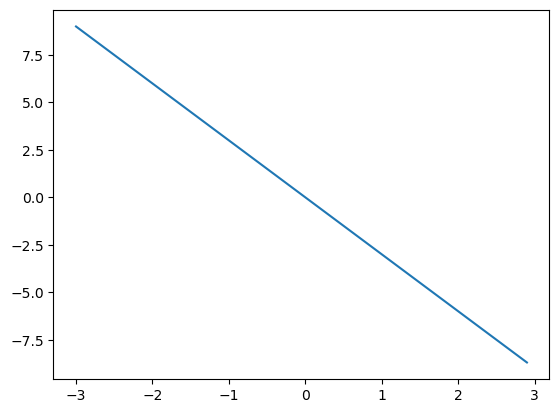

In [49]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

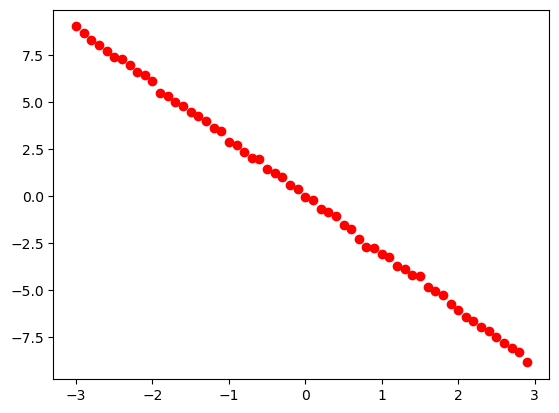

In [50]:
Y = f+0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [51]:
def forward(x):
    return w*x            # 초기값 또는 갱신되는 w값(기울기)을 적용하여 전진 계산

def criterion(yhat, y):             # 정답과 갱신된 w값을 이용한 결과 비교 : 성능 평가
    return torch.mean((yhat-y)**2)

In [64]:
lr = 0.1    # learning rate : 만일 너무 큰 값을 적용 한다면 / 작은 값을 적용한다면
COST = []

for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)   # 난수가 포함된 Y가 정답이고, w값이 갱신되면서 구해지는 Yhat 비교
    
    loss.backward()
    
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()
    
    COST.append(loss.item())    # epoch별 loss를 계산하여 갱신

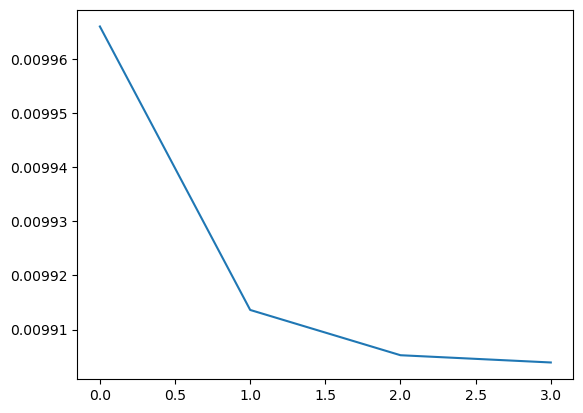

In [65]:
plt.plot(range(4), COST)
plt.show()

In [63]:
w

tensor(-3.0067, requires_grad=True)

## Linear Regression Training Slope + Bias

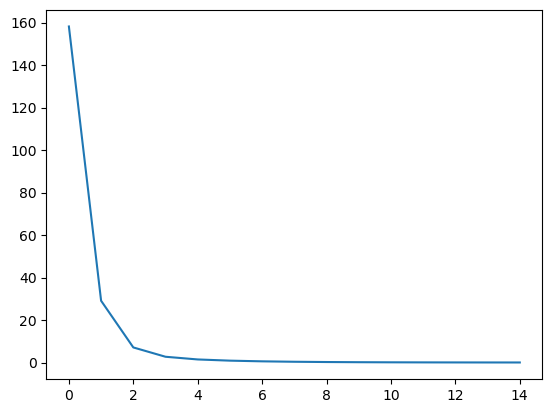

In [69]:
import torch

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-3.0, requires_grad=True)

X = torch.arange(-3, 3, 0.1).view(-1, 1)      # 텐서 생성 후 1열로 변경

f = -3*X-6
Y = f+0.1*torch.randn(X.size())


def forward(x):
    return w*x+b            

def criterion(yhat, y):             
    return torch.mean((yhat-y)**2)


lr = 0.1    # learning rate : 만일 너무 큰 값을 적용 한다면 / 작은 값을 적용한다면
COST = []

for epoch in range(15):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)   # 난수가 포함된 Y가 정답이고, w값이 갱신되면서 구해지는 Yhat 비교
    
    loss.backward()
    
    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()
    
    b.data = b.data - lr*b.grad.data
    b.grad.data.zero_()
    
    COST.append(loss.item()) 
    
plt.plot(range(15), COST)
plt.show()

In [70]:
print(w, b)

tensor(-2.9976, requires_grad=True) tensor(-5.9035, requires_grad=True)
